# Finales Modell

In diesem Notebook wollen wir ein deutlich größeres Netz als bisher trainieren. Auch hier wird wieder eine standard-Architektur (in diese Fall [Resnet50](https://arxiv.org/abs/1512.03385)) mit Transfer-Learning verwendet.

Dieses mal, wird die Faltungsbasis jedoch nicht eingefroren, sondern mit relativ kleiner Lernrate mittrainiert.

In [0]:
from keras import layers 
from keras import models

from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator

import pylab as pl

from keras.applications import ResNet50

TRAIN_DIR = 'Cat_Dog_data/train'
VALIDATION_DIR = 'Cat_Dog_data/test'

BATCH_SIZE = 32

TARGET_SIZE = (244,244)

Using TensorFlow backend.


In [0]:
datagen_train = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range=(0.8,1.2))

datagen_validation = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(TRAIN_DIR,
                                                    target_size=TARGET_SIZE,
                                                    color_mode='rgb',
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary'
                                                   )

validation_generator = datagen_validation.flow_from_directory(VALIDATION_DIR,
                                                    target_size=TARGET_SIZE,
                                                    color_mode='rgb',
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [0]:
conv_base = ResNet50(weights='imagenet',include_top=False,input_shape=(TARGET_SIZE[0],TARGET_SIZE[1],3))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
model = models.Sequential()

model.add(conv_base)
          
model.add(layers.Flatten())
          
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
          
model.summary()          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4194336   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 27,782,081
Trainable params: 27,728,961
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [0]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_data=validation_generator,
                   validation_steps=50,
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
100/100 [==============================] - 83s 828ms/step - loss: 0.2527 - acc: 0.8984 - val_loss: 0.0909 - val_acc: 0.9681
Epoch 2/15
100/100 [==============================] - 68s 676ms/step - loss: 0.1085 - acc: 0.9584 - val_loss: 0.0826 - val_acc: 0.9701
Epoch 3/15
100/100 [==============================] - 68s 677ms/step - loss: 0.0976 - acc: 0.9688 - val_loss: 0.0564 - val_acc: 0.9819
Epoch 4/15
100/100 [==============================] - 68s 676ms/step - loss: 0.0778 - acc: 0.9747 - val_loss: 0.0625 - val_acc: 0.9835
Epoch 5/15
100/100 [==============================] - 68s 676ms/step - loss: 0.0748 - acc: 0.9756 - val_loss: 0.0688 - val_acc: 0.9822
Epoch 6/15
100/100 [==============================] - 68s 680ms/step - loss: 0.0848 - acc: 0.9725 - val_loss: 0.0482 - val_acc: 0.9844
Epoch 7/15
100/100 [==============================] - 68s 676ms/step - loss: 0.0676 - acc: 0.9781 - val_loss: 0.0501 - val_acc: 0.9860
Epoch 8

Text(0, 0.5, 'Binary Accuracy')

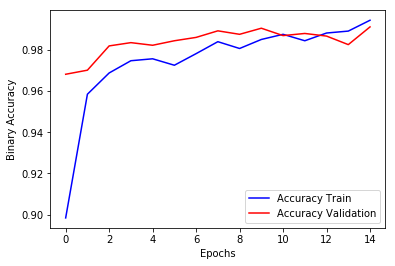

In [0]:
pl.plot(history.history['acc'],'b',label='Accuracy Train')
pl.plot(history.history['val_acc'],'r',label='Accuracy Validation')

pl.legend()
pl.xlabel('Epochs')
pl.ylabel('Binary Accuracy')

In [0]:
model.save('final_model.h5')